# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics


In [2]:
trainset=pd.read_csv('train.csv',nrows=36000)
trainset['joining_date'].head()

0     8/17/2017
1     8/28/2017
2    11/11/2016
3    10/29/2016
4     9/12/2017
Name: joining_date, dtype: object

In [3]:
month=[]
d=np.array(trainset['joining_date'])
for il in range(len(d)):
    month.append(((2021-(int(d[il].split("/")[2])))*12)+int(d[il].split("/")[0]))
trainset['Month']=month
trainset['Month']=trainset['Month'].astype(int)

In [4]:
trainset.drop(['referral_id','security_no','Name','customer_id','joining_date'],axis=1,inplace=True)
trainset.shape

(36000, 20)

In [5]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,56
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,56
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,71
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,70
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,57


# Data Pre-processing

In [6]:
def myfun(d_s):
    ar=np.array(d_s)
    for i in range(len(ar)):
        if(ar[i]=="?" or ar[i]=="Error" or ar[i]=="Unknown"):
            ar[i]=np.nan
        
    d_s=ar
    return d_s
def myfunint(d_set):
    a=np.array(d_set)
    for j in range(len(a)):
        if(a[j]<0):
            a[j]=0
    m=a.mean()
    for k in range(len(a)):
        if(a[k]==0):
            a[k]=int(m)
    d_set=a
    return d_set   

In [7]:
trainset['joined_through_referral'],trainset['gender'],trainset['medium_of_operation'],trainset['avg_frequency_login_days'],trainset['complaint_status']=myfun(trainset['joined_through_referral']),myfun(trainset['gender']),myfun(trainset['medium_of_operation']),myfun(trainset['avg_frequency_login_days']),myfun(trainset['complaint_status'])

In [8]:
trainset['days_since_last_login'],trainset['avg_time_spent']=myfunint(trainset['days_since_last_login']),myfunint(trainset['avg_time_spent'])

In [9]:
trainset.isnull().any()

age                             False
gender                           True
region_category                  True
membership_category             False
joined_through_referral          True
preferred_offer_types            True
medium_of_operation              True
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Replacing of Nan values

In [10]:
col=['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']
for c in range(len(col)):
    trainset[col[c]]=trainset[col[c]].fillna(value=trainset[col[c]].mode().iloc[0])

In [11]:
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].astype(float)
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].fillna(value=trainset['avg_frequency_login_days'].mean())
trainset['points_in_wallet']=trainset['points_in_wallet'].fillna(value=trainset['points_in_wallet'].mean())

In [12]:
trainset.isnull().any()

age                             False
gender                          False
region_category                 False
membership_category             False
joined_through_referral         False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Label Encoding

In [13]:
df_col=['gender','offer_application_preference','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','past_complaint','complaint_status','feedback']
for i in range(len(df_col)):
    trainset[df_col[i]] = LabelEncoder().fit_transform(trainset[df_col[i]])

In [14]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,1,4,2,56
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.883586,1,0,1,2,5,1,56
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,3,3,5,71
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,4,3,5,70
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,2,3,5,57


# Data Visualisations

trainset.hist(['age','days_since_last_login','avg_time_spent','avg_transaction_value'
                 ,'avg_frequency_login_days','points_in_wallet','offer_application_preference','used_special_discount'],figsize=(18,10),)

sns.pairplot(trainset, vars=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet','Month'], hue = "churn_risk_score")

# Feture Extraction

###### Checking if any duplicate rows

In [15]:
dups = trainset.duplicated()
print(dups.any())
#print(trainset[dups])

False


###### Correlation

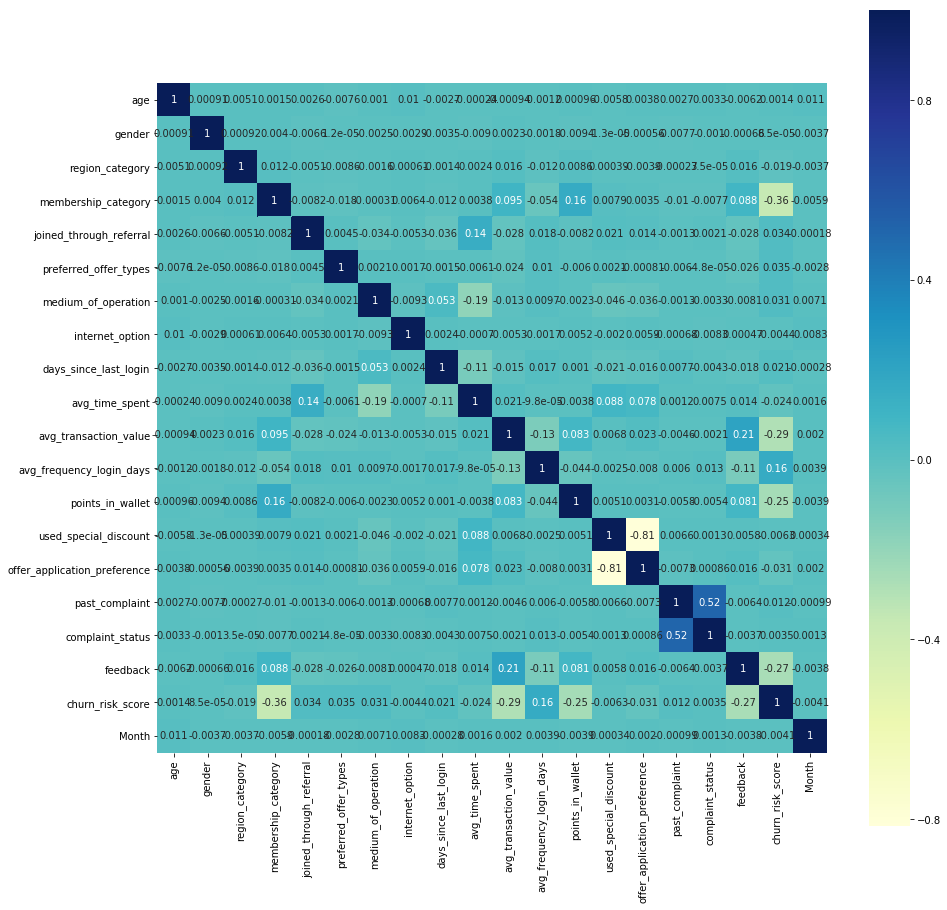

In [16]:
corr = trainset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [17]:
def correlation(trainset, threshold):
    col_corr = set()  
    corr_matrix = trainset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(trainset, 0.8)
len(set(corr_features))

1

In [19]:
corr_features

{'offer_application_preference'}

In [20]:
trainset.drop(['offer_application_preference'],axis=1,inplace=True)


###### Varaince Threshold

In [21]:
x=trainset.drop(labels=['churn_risk_score'], axis=1)
y=trainset['churn_risk_score']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [23]:
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(x_train)

VarianceThreshold(threshold=0.1)

In [24]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [25]:
len(x.columns[var_thres.get_support()])

18

In [26]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [331]:
for column in constant_columns:
    print(column)

# Modelling

###### SVM

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', SVC(kernel='rbf',C=100,gamma=0.01))
])

In [31]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [32]:
y_pred=pipe.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       239
           1       0.48      0.51      0.50       518
           2       0.50      0.39      0.44       493
           3       0.67      0.68      0.68      2032
           4       0.46      0.25      0.33      2035
           5       0.49      0.81      0.61      1883

    accuracy                           0.54      7200
   macro avg       0.43      0.44      0.43      7200
weighted avg       0.52      0.54      0.51      7200



param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
                         } 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


###### Naive Bias

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier',  BernoulliNB(alpha=0.6))
])

In [28]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 BernoulliNB(alpha=0.6, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [29]:
y_pred=pipe.predict(x_test)

In [335]:
print(metrics.accuracy_score(y_train,y_pred))

0.5434722222222222

In [336]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       239
           1       0.33      0.29      0.31       518
           2       0.40      0.52      0.45       493
           3       0.76      0.62      0.69      2032
           4       0.42      0.39      0.41      2035
           5       0.57      0.77      0.65      1883

    accuracy                           0.54      7200
   macro avg       0.41      0.43      0.42      7200
weighted avg       0.53      0.54      0.53      7200



D:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### decision tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(class_weight=None,criterion='gini', max_depth=10,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=None, splitter='best')

In [204]:
dt.fit(x_train,y_train)

D:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [205]:
y_pred=dt.predict(x_test)

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7423611111111111

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       239
           1       0.68      0.81      0.74       518
           2       0.75      0.65      0.70       493
           3       0.87      0.91      0.89      2032
           4       0.75      0.49      0.59      2035
           5       0.66      0.93      0.77      1883

    accuracy                           0.74      7200
   macro avg       0.62      0.63      0.62      7200
weighted avg       0.73      0.74      0.72      7200



###### Random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=11,random_state= 0,n_jobs = -1)

In [39]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [40]:
y_pred=rf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [42]:
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets